Topics Covered:


- Supervised Learning Classification
- Scoring: Mean Accuracy ((TP + TN)/Total)
- Nearest Neighbor
- SVC (Support Vector Machine Classificator)
- GridSearch CV
- Random Forest
- Neural Networks

Intuition: 
A classifier works for one type of problem but not other

In [ ]:
def getDataSet1():
    import pandas as pd

    df = pd.read_csv('scores.txt',header=None)
    df.columns = ['test1','test2','pass']

    X = df[['test1','test2']]
    y = df['pass']
    
    return(X, y, df)


In [ ]:
def getDataSet2():
    import pandas as pd

    df = pd.read_csv('transistor.txt',header=None)
    df.columns = ['test1','test2','pass']
    
    X = df[['test1','test2']]
    y = df['pass']
    return(X, y, df)

In [ ]:
def getDataSet3():
    import pandas as pd

    df = pd.read_csv('barbecue.txt',header=None)
    df.columns = ['test1','test2','pass']
    df['test1']=df['test1'].apply(lambda x: (x + 1)/2)
    df['test2']=df['test2'].apply(lambda x: (x + 1)/2)
    X = df[['test1','test2']]
    y = df['pass']
    return(X, y, df)

In [ ]:
def getDataSet4():
    import pandas as pd

    df = pd.read_csv('ex8a.txt',header=None)
    df.columns = ['pass','test1','test2']
    
    X = df[['test1','test2']]
    y = df['pass']
    return(X, y, df)

In [ ]:
def plotCounts():
    # use if not doing plot.show()
    %matplotlib inline 
    import seaborn as sns
    
    (X, y, df) = getDataSet1()
    sns.countplot(y)
    
plotCounts()

In [ ]:
def plotData():
    import matplotlib.pyplot as plt
    
    (X,y,df) = getDataSet1()
    notPassed = df[df['pass'] == 0]
    passed = df[df['pass'] == 1]
    
    npas, = plt.plot(notPassed['test1'],notPassed['test2'],'go')
    pas, = plt.plot(passed['test1'],passed['test2'],'bo')
    plt.ylabel('test2')
    plt.xlabel('test1')
    plt.title('Test 1 vs Test2')
    plt.legend([pas, npas], ['Passed', 'Not passed'])
    plt.show()

plotData()
    

In [ ]:
def plotSolution(df,predict,classifier):
    
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.colors import ListedColormap
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    
    gridSize = (df['test1'].max() - df['test1'].min())/100
    
    x_min, x_max = df['test1'].min() - 3*gridSize, df['test1'].max() + 3*gridSize
    y_min, y_max = df['test2'].min() - 3*gridSize, df['test2'].max() + 3*gridSize
    xx, yy = np.meshgrid(np.arange(x_min, x_max, gridSize),np.arange(y_min, y_max, gridSize))
    
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    notPassed = df[df['pass'] == 0]
    passed = df[df['pass'] == 1]
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    npas, = plt.plot(notPassed['test1'],notPassed['test2'],'go')
    pas, = plt.plot(passed['test1'],passed['test2'],'bo')
    plt.ylabel('test2')
    plt.xlabel('test1')
    plt.title(classifier)
    plt.legend([pas, npas], ['Passed', 'Not passed'])
    plt.show()

In [ ]:
# always a good idea to do the dummy classifier to get a baseline
def getDummyClassifier():
    from sklearn.dummy import DummyClassifier
    from sklearn.model_selection import train_test_split
    
    (X,y,df) = getDataSet1()
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    dummy = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
    plotSolution(df,dummy.predict,'Dummy Classifier')
    return (dummy.score(X_train, y_train),dummy.score(X_test, y_test))

getDummyClassifier()

In [ ]:
# logistic regression with default parameters
def getLogisticRegression():
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    
    (X,y,df) = getDataSet1()
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    logReg = LogisticRegression(random_state=0).fit(X_train,y_train)
    plotSolution(df,logReg.predict,'Logistic Regression')
    return (logReg.score(X_train, y_train),logReg.score(X_test, y_test))

getLogisticRegression()

In [ ]:
# change the n_neighbors parameter between 1 and 4 notice the
# different graph and results
# how many nearest neighbors is best for data set 1, how about for dataset 2?
def getKNearestNeighbor():
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    
    neighbors=3
    (X,y,df) = getDataSet1()
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    neigh = KNeighborsClassifier(n_neighbors = neighbors).fit(X_train,y_train)
    plotSolution(df,neigh.predict,str(neighbors) + ' Nearest Neighbors')
    return (neigh.score(X_train, y_train),neigh.score(X_test, y_test))

getKNearestNeighbor()
    

In [ ]:
# change depth from 1 to 10, what do you notice?
def getDecisionTree():
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    
    depth = 1
    (X,y,df) = getDataSet1()
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    tree = DecisionTreeClassifier(max_depth = depth, random_state=0).fit(X_train,y_train)
    plotSolution(df,tree.predict,'Decision Tree, depth: ' + str(depth))
    return (tree.score(X_train, y_train),tree.score(X_test, y_test))

getDecisionTree()

In [ ]:
# use rbf and linear kernel for each dataset
def getSVC():

    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC 
    
    kernelToUse = 'rbf' #try linear as well
    (X,y,df) = getDataSet1()
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    svc = SVC(kernel = kernelToUse).fit(X_train,y_train)
    plotSolution(df,svc.predict, 'SVC, kernel ' + kernelToUse)
    return (svc.score(X_train, y_train),svc.score(X_test, y_test))

getSVC()

In [ ]:
# notice how the best model that fits each dataset is different
def getSVCGridSearch():

    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    
    (X,y,df) = getDataSet1()
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    parameters = {'kernel':('linear', 'rbf'), 'C':[1,5,10,20,50,100]}
    clf = GridSearchCV(SVC(), parameters)
    clf.fit(X_train,y_train)
    svc = clf.best_estimator_.fit(X_train,y_train)
    plotSolution(df,svc.predict,'SVC ' + str(clf.best_params_))
    print(svc)
    return (svc.score(X_train, y_train),svc.score(X_test, y_test))

getSVCGridSearch()

In [ ]:
# with your best nearest neighbor for dataset1 calculate the probability that 
# a student that gets 55 and 55, and 60 and 60 will pass, how about 65 and 65? 
# 70 and 70?
# SVC cannot give you probability, will only give you the prediction, so for the best SVC found for dataset1
# tell me if that student is going to pass or not for the same grades above
def calculateProb():

    print("nearest neighbors and svc results")
calculateProb()

In [ ]:
# RandomForest uses a multitude of decision trees, change the max depth to see how the model changes
def getRandomForest():

    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier 
    
    maxDepth = 1
    (X,y,df) = getDataSet1()
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    rfc = RandomForestClassifier(max_depth = maxDepth, random_state=0).fit(X_train,y_train)
    plotSolution(df,rfc.predict, 'RandomForestClassifier, max_depth ' + str(maxDepth))
    return (rfc.score(X_train, y_train),rfc.score(X_test, y_test))

getRandomForest()

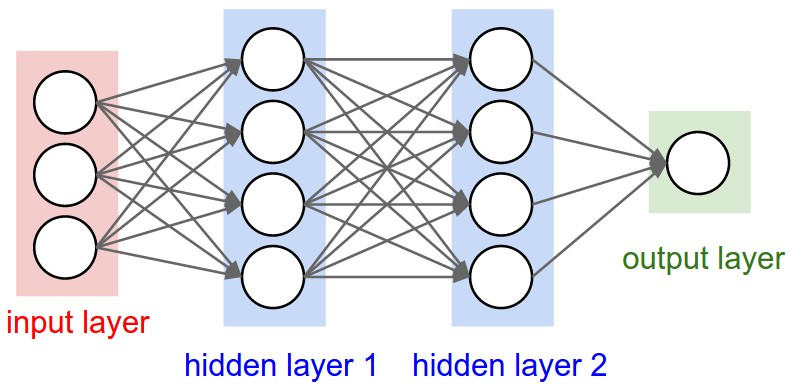

In [1]:
# https://www.pyimagesearch.com/wp-content/uploads/2016/08/simple_neural_network_header.jpg?width=600

def plotNeuralNetwork():
    from IPython.display import Image, display
    display(Image('simple_neural_network_header.jpg'))
    
plotNeuralNetwork()

In [ ]:
def getNeuralNet():

    from sklearn.model_selection import train_test_split
    from sklearn.neural_network import MLPClassifier 
    
    hiddenLayers = 100
    maxIter = 2000
    (X,y,df) = getDataSet1()
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    nn = MLPClassifier(hidden_layer_sizes = hiddenLayers, max_iter = maxIter, random_state=0).fit(X_train,y_train)
    plotSolution(df,nn.predict, 'MLPClassifier, hidden_layer_sizes ' + str(hiddenLayers))
    return (nn.score(X_train, y_train),nn.score(X_test, y_test))

getNeuralNet()